# Compare integration methods Ode45 (Matlab) vs. Euler's
![title](10_02_Fma.jpg)

$F_o=2N, \omega\in\left<1,20\right)s^{-1}$

$m=1.0kg$

$b=1Nms^{-1}$

$k=100Nm^{-1}$

$F\left(t\right)=F_o\sin\left(\omega_0 t\right)$

## Movement equation

$m\ddot{q}+b\dot{q}+kq=F(t)$

## Simulink
![title](masseffect.png)


## Load data from disk

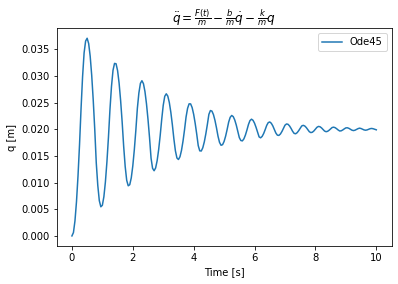

In [9]:
import pylab as plt
import numpy as np
from math import sqrt

#
# Ode45 data from matlab
data = np.loadtxt('masseffect_q.txt')
xaxe = np.linspace(0, 10, np.size(data))
plt.plot(xaxe, data)
plt.title(r'$\ddot{q}=\frac{F(t)}{m}-\frac{b}{m}\dot{q}-\frac{k}{m}q$')
plt.xlabel('Time [s]')
plt.ylabel('q [m]')
plt.legend(['Ode45'])
plt.show()

## Euler's method simulation

Movement equation:

$m\ddot{q}+b\dot{q}+kq=F(t)$ kde $q=x$

rewrite as:

$\ddot{q}=\frac{F(t)}{m}-\frac{b}{m}\dot{q}-\frac{k}{m}q$

integrate in three steps:

$\ddot{q_t}=\frac{F(t)}{m}-\frac{b}{m}\dot{q}_{t-1}-\frac{k}{m}q_{t-1}$

$\dot{q}_{t} = \dot{q}_{t-1} + \ddot{q}_{t}\Delta_t$

$q_{t} = q_{t-1} + \dot{q}_{t}\Delta_t$


dt = 0.004972650422675286
Omega = 10.0


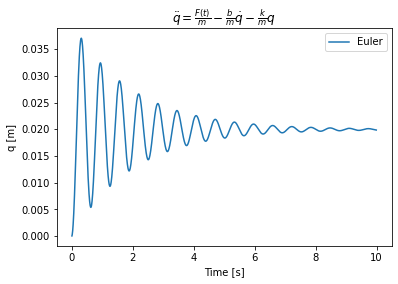

In [10]:
#==============================================================================
# simulation setup
steps = np.size(data)*10
dt = 10. / (steps+1)
print('dt =', dt)

#==============================================================================
# model parameters
m = 1.0  # kg
k = 100. # N/m
b = 1.0  # Nm/s
F_zero = 2. # [N] - constant force

#==============================================================================
# find critical frequency
omega = sqrt(k/m)
print('Omega =', omega)

#==============================================================================
# simulation
F = F_zero * np.sin(omega * np.linspace(0, steps*dt, steps+1))
q = 0        # x
q_dot = 0    # v
q_2dot = 0   # a
t, a, v, x, f = [], [], [], [], []
for i in range(steps):
    """
    Runge-Kutta first order -> Euler
    """
    #q_2dot = (F[i] / m) - (b / m) * q_dot - (k / m) * q
    
    q_2dot = (F_zero / m) - (b / m) * q_dot - (k / m) * q
    q_dot = q_dot + q_2dot * dt
    q = q + q_dot * dt
    
    a.append(q_2dot)
    v.append(q_dot)
    x.append(q)
    t.append(dt*i)
    
#==============================================================================
# plot results
plt.plot(t, x)
# 
# nice syntactic sugar
plt.title(r'$\ddot{q}=\frac{F(t)}{m}-\frac{b}{m}\dot{q}-\frac{k}{m}q$')
plt.xlabel('Time [s]')
plt.ylabel('q [m]')
plt.legend(['Euler'])
# 
# show
plt.show()


## Compare the results

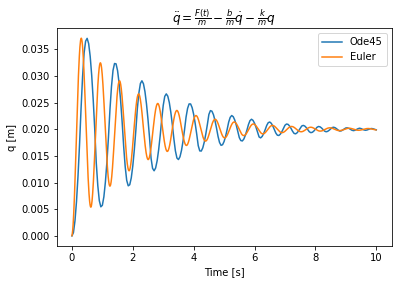

In [11]:
plt.plot(xaxe, data)

plt.plot(t, x)
# 
# nice syntactic sugar
plt.title(r'$\ddot{q}=\frac{F(t)}{m}-\frac{b}{m}\dot{q}-\frac{k}{m}q$')
plt.xlabel('Time [s]')
plt.ylabel('q [m]')
plt.legend(['Ode45','Euler'])
# 
# show
plt.show()
